In [1]:
import sys
import os

#Get present working directory
if sys.platform == 'win32' or sys.platform == 'cygwin':
    pwd = !CD
else:
    pwd = !pwd

#Get directory up one level
pwd = pwd[0]
updir = pwd[:pwd.rfind(os.sep)]
#Add same directory as main.py to path
sys.path.insert(0, updir)

#Pretend that we're in main.py now
from algorithms import AbstractSynthesizer

In [2]:
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

#Validate that Pillow is reading the JPEG data correctly
#This may need to be run twice for the cell to behave correctly
imageData = mpimage.imread("../sample-inputs/CMPSC458/apples.jpg")
#imageData = mpimage.imread("../sample-inputs/tri.png")
plt.imshow(imageData)
print(imageData[0][0])
print(len(imageData), len(imageData[0]))

[160 184  72]
124 185


# Test Cells
The following cells are used to test synthesis methods - transparent is 0, range is 0-1

In [3]:
outputSize = (256, 256)

In [14]:
from algorithms.AbstractSynthesizer import AbstractSynthesizer
from algorithms.Pixel import Pixel
import numpy as np
import typing
from typing import List, Union, Tuple
import random

class EfrosLeungSynthesizer(AbstractSynthesizer):
    """
    This class realizes a synthesizer based on that of the 1999 paper by Efros & Leung
    See definitions in Abstract Synthesizer for how to use
    """
    
    def __init__(self, textonNeighborhoodDiameter: int):
        self.textonNeighborhoodDiameter = textonNeighborhoodDiameter
    
    def getDescription(self) -> str:
        return "Pixel based texture synthesis using methods derived from Efros & Leung's 1999 paper.  Uses fully transparent pixels to identify areas for texture synthesis"
    
    @staticmethod
    def __generateBaseImage(inputData: Union[List, np.ndarray], outputSize: Tuple[int, int]) -> List[Pixel]:
        """
        Generate the image on which to draw; this implementation does not use constrained synthesis.  Use the EfrosLeungConstrainedSynthesizer instead for that.
        Args:
            inputData: An array-like-object of two dimensions with a single value for greyscale or a tuple for RGB/RGBA data
            outputSize: A tuple dictating the size of the output image in (X, Y)
            
        Returns:
            A 2D list of pixel objects
        """
        #Sanity check before generating and seeding
        if outputSize[0] < 3 or outputSize[1] < 3:
            raise ValueError("Output image must be 3x3 or larger")
           
        numchannels = len(inputData[0][0])\
        
        #Generate a blank image of the desired size
        pixels = []
        for i in range(outputSize[1]):
            pixels.append([])
            for j in range(outputSize[0]):
                pixels[i].append(Pixel())
        
        #Populate the seed
        x_samp = random.randint(0,len(inputData[0])-2)
        y_samp = random.randint(0, len(inputData)-2)
        x_out = int(outputSize[1]/2)-2
        y_out = int(outputSize[0]/2)-2
        for i in range(3):
            for j in range(3):
                pixelData = inputData[y_samp+i][x_samp+j]
                if numchannels == 4:
                    pixel = Pixel(pixelData[3], pixelData[0], pixelData[1], pixelData[2], True)
                elif numchannels == 1:
                    pixel = Pixel(pixelData[3], filled=True)
                else:
                    pixel = Pixel(1.0, pixelData[0], pixelData[1], pixelData[2], True)
                pixels[y_out+i][x_out+j] = pixel
                
        return pixels
    
    @staticmethod    
    def __pixelArrayToImage(pixels: List[Pixel], numchannels: int) -> List:
        """
        Converts the pixel array to a matplotlib compatible list
        
        Args:
            pixels: A 2D list of pixels to convert to an image
            numchannels: An integer describing the number of channels
        
        Returns:
            A matplotlib compatible 2D list
        """
        imageData = []
        for row in pixels:
            rowData = []
            for pixel in row:
                if numchannels == 4:
                    rowData.append(pixel.getRGBA())
                elif numchannels == 1:
                    rowData.append(pixel.getGreyscale())
                else:
                    rowData.append(pixel.getRGB())
            imageData.append(rowData)
        return imageData
    
    def generateTexture(self, inputData: Union[List, np.ndarray], outputSize: Tuple[int, int]) -> Union[List, np.ndarray]:
        numchannels = len(inputData[0][0])
        pixels = EfrosLeungSynthesizer.__generateBaseImage(inputData, outputSize)
        return EfrosLeungSynthesizer.__pixelArrayToImage(pixels, numchannels)

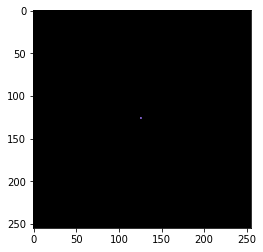

In [15]:
synth = EfrosLeungSynthesizer(15)
newImage = synth.generateTexture(imageData, (255, 255))
plt.imshow(newImage)